## Importamos todos los paquetes aquí por comodidad

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [4]:
import os
os.getcwd()

'c:\\Users\\alber\\OneDrive\\Desktop\\Programación\\Estadística\\t1_estadistica_descriptiva'

## Cargamos los datos con los que se trabaja

In [ ]:
nom_fi_datos_temp = 'G09B_2m_temperature.csv'
nom_fi_datos_irrad = 'G09B_surface_solar_radiation_downwards.csv'
nom_fi_datos_precip = 'G09B_total_precipitation.csv'
ruta = f"{os.getcwd()}./DATOS_IMAT_2026"

In [6]:
ruta_csv = os.path.join(ruta, f'{nom_fi_datos_temp}')
df_orig_temp = pd.read_csv(ruta_csv)

# parseamos la fecha (cadena) para que sea un datetime con formato yyyy/mm/dd 
df_orig_temp['FECHA'] = pd.to_datetime(df_orig_temp['FECHA'], format='%Y-%m-%d')

s = df_orig_temp.loc[:,'FECHA']
df_orig_temp['FECHA'] =  s.dt.date

print('Tamaño de df_orig_temp con los datos cargados:', df_orig_temp.shape)
print('Dataframe con todos los datos leidos (filas: días, columnas: variables):')
print(df_orig_temp)

Tamaño de df_orig_temp con los datos cargados: (4383, 15)
Dataframe con todos los datos leidos (filas: días, columnas: variables):
           FECHA  TEMP_CELDA01  TEMP_CELDA02  TEMP_CELDA03  TEMP_CELDA04  \
0     2014-01-01      9.304810      9.234131      9.134725      8.917480   
1     2014-01-02     11.986209     11.888858     11.768883     11.706729   
2     2014-01-03     13.474006     13.405910     13.308051     13.187058   
3     2014-01-04     11.460185     11.400940     11.306010     11.271545   
4     2014-01-05      7.990672      8.004791      7.974009      7.590749   
...          ...           ...           ...           ...           ...   
4378  2025-12-27      6.853189      6.883666      6.892943      6.586832   
4379  2025-12-28      8.640758      8.662160      8.675710      8.074249   
4380  2025-12-29      7.409761      7.522859      7.593782      6.951753   
4381  2025-12-30      8.605798      8.644759      8.652287      7.629785   
4382  2025-12-31      7.655819   

In [7]:
ruta_csv = os.path.join(ruta, f'{nom_fi_datos_irrad}')
df_orig_irrad = pd.read_csv(ruta_csv)

# parseamos la fecha (cadena) para que sea un datetime con formato yyyy/mm/dd 
df_orig_irrad['FECHA'] = pd.to_datetime(df_orig_irrad['FECHA'], format='%Y-%m-%d')

s = df_orig_irrad.loc[:,'FECHA']
df_orig_irrad['FECHA'] =  s.dt.date

print('Tamaño de df_orig_irrad con los datos cargados:', df_orig_irrad.shape)
print('Dataframe con todos los datos leidos (filas: días, columnas: variables):')
print(df_orig_irrad)

Tamaño de df_orig_irrad con los datos cargados: (4383, 15)
Dataframe con todos los datos leidos (filas: días, columnas: variables):
           FECHA  IRRAD_CELDA01  IRRAD_CELDA02  IRRAD_CELDA03  IRRAD_CELDA04  \
0     2014-01-01     115052.090      116058.72     117144.510     124034.305   
1     2014-01-02      41331.902       42819.19      44443.027      47356.984   
2     2014-01-03     214942.060      213810.11     212982.980     213736.770   
3     2014-01-04     199180.020      202540.73     206267.520     223612.020   
4     2014-01-05     339598.160      340947.47     342551.250     362387.530   
...          ...            ...            ...            ...            ...   
4378  2025-12-27     379893.340      383727.75     387323.000     375560.840   
4379  2025-12-28     262529.000      266756.60     271207.100     259785.250   
4380  2025-12-29     329415.220      324105.10     319004.780     332916.300   
4381  2025-12-30     230222.250      230011.12     229510.380     24

In [8]:
ruta_csv = os.path.join(ruta, f'{nom_fi_datos_precip}')
df_orig_precip = pd.read_csv(ruta_csv)

# parseamos la fecha (cadena) para que sea un datetime con formato yyyy/mm/dd 
df_orig_precip['FECHA'] = pd.to_datetime(df_orig_precip['FECHA'], format='%Y-%m-%d')

s = df_orig_precip.loc[:,'FECHA']
df_orig_precip['FECHA'] =  s.dt.date

print('Tamaño de df_orig_precip con los datos cargados:', df_orig_precip.shape)
print('Dataframe con todos los datos leidos (filas: días, columnas: variables):')
print(df_orig_precip)

Tamaño de df_orig_precip con los datos cargados: (4383, 15)
Dataframe con todos los datos leidos (filas: días, columnas: variables):
           FECHA  PRECIP_CELDA01  PRECIP_CELDA02  PRECIP_CELDA03  \
0     2014-01-01    5.222972e-05    5.567270e-05    6.207686e-05   
1     2014-01-02    2.829492e-04    2.610149e-04    2.392352e-04   
2     2014-01-03    7.870304e-05    7.244614e-05    6.612432e-05   
3     2014-01-04    2.773070e-04    2.945224e-04    3.124298e-04   
4     2014-01-05    1.086543e-09    1.086543e-09    4.656613e-10   
...          ...             ...             ...             ...   
4378  2025-12-27    1.374398e-04    1.162603e-04    9.133236e-05   
4379  2025-12-28    1.895956e-04    1.597584e-04    1.191642e-04   
4380  2025-12-29    2.286239e-07    1.398378e-07    6.116477e-08   
4381  2025-12-30    4.570943e-06    4.334596e-06    4.195520e-06   
4382  2025-12-31    5.398466e-08    5.398466e-08    5.398466e-08   

      PRECIP_CELDA04  PRECIP_CELDA05  PRECIP_CELDA

### 1. Visión general de las series

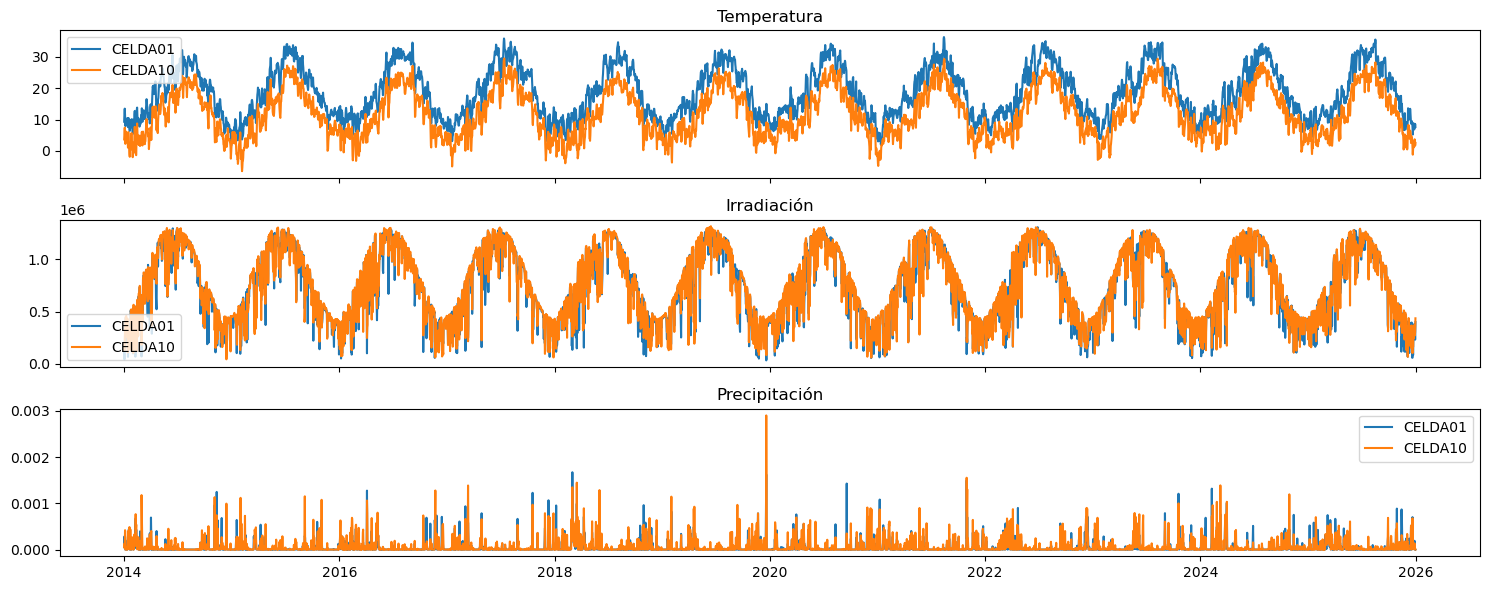

In [9]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(15, 6),
    sharex=True
)

# Temperatura
axes[0].plot(df_orig_temp.FECHA, df_orig_temp.TEMP_CELDA01, label='CELDA01')
axes[0].plot(df_orig_temp.FECHA, df_orig_temp.TEMP_CELDA10, label='CELDA10')
axes[0].set_title('Temperatura')
axes[0].legend()

# Irradiación
axes[1].plot(df_orig_irrad.FECHA, df_orig_irrad.IRRAD_CELDA01, label='CELDA01')
axes[1].plot(df_orig_irrad.FECHA, df_orig_irrad.IRRAD_CELDA10, label='CELDA10')
axes[1].set_title('Irradiación')
axes[1].legend()

# Precipitación
axes[2].plot(df_orig_precip.FECHA, df_orig_precip.PRECIP_CELDA01, label='CELDA01')
axes[2].plot(df_orig_precip.FECHA, df_orig_precip.PRECIP_CELDA10, label='CELDA10')
axes[2].set_title('Precipitación')
axes[2].legend()

plt.tight_layout()
plt.show()
